In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('brca.csv')
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

In [5]:
# There's no null values present in our dataset.
#  All the features are numerical and target variable is categorical.

In [6]:
df.duplicated().value_counts()

False    569
dtype: int64

In [7]:
# There's no duplicated values

In [8]:
# Descriptive Analysis
df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# From the above table we can understand the distribution of our features in terms of quantiles.

# Exploartory Data Analysis

#Univariate Analysis

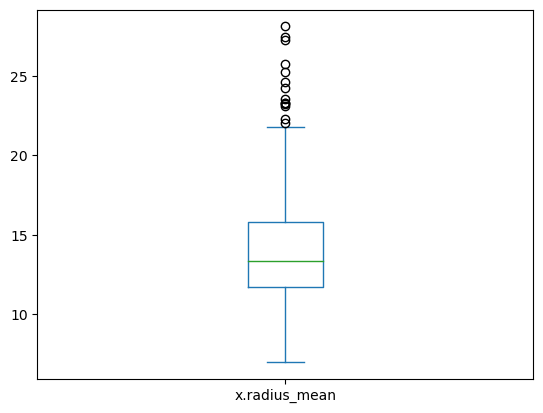

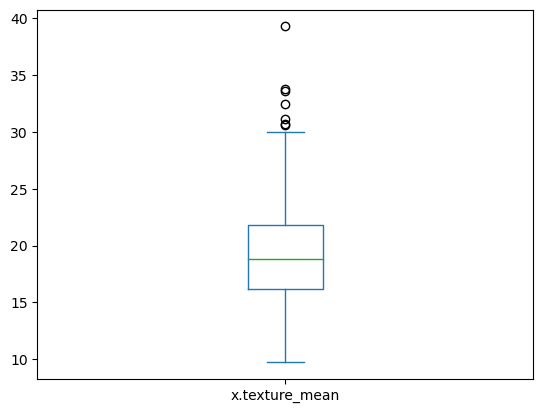

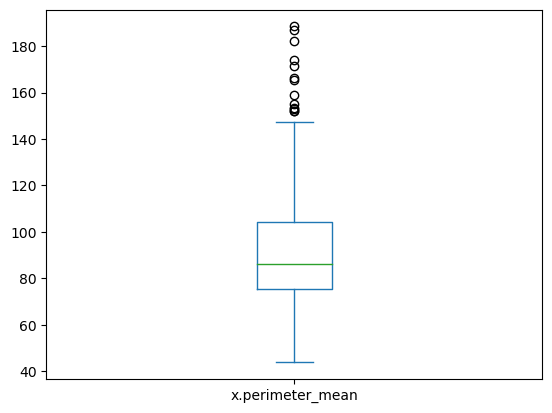

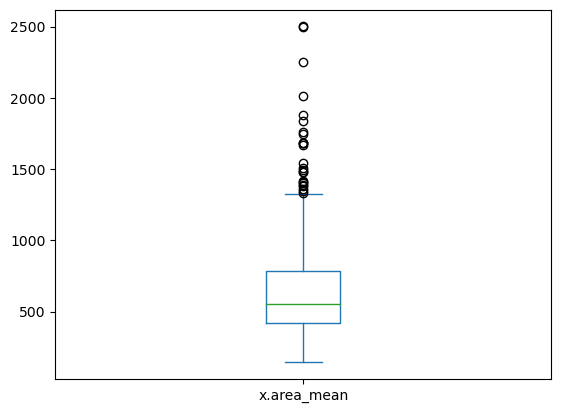

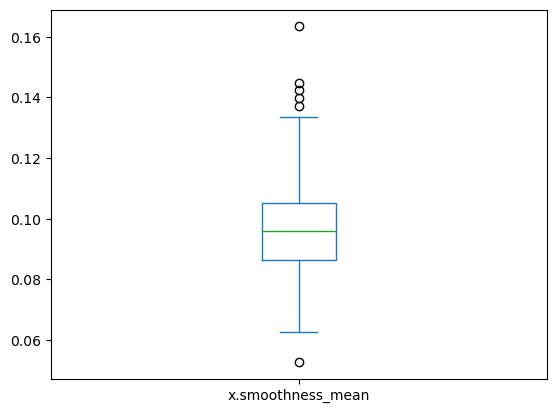

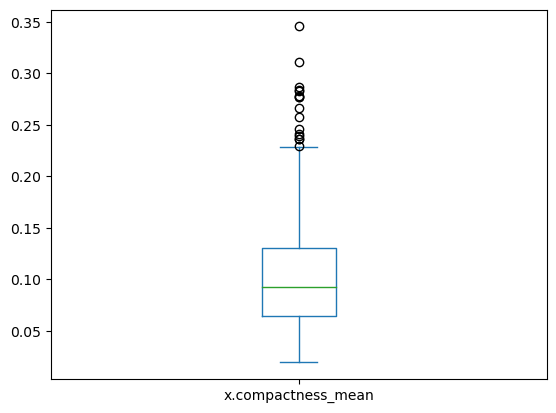

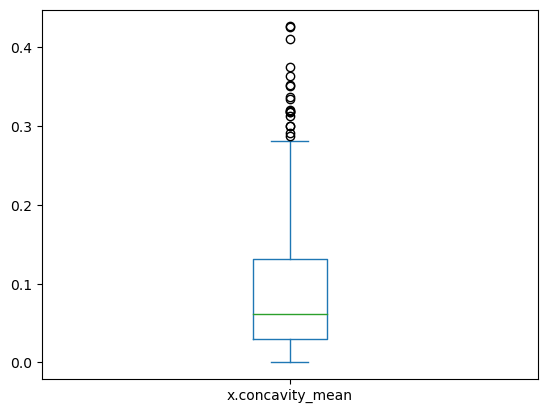

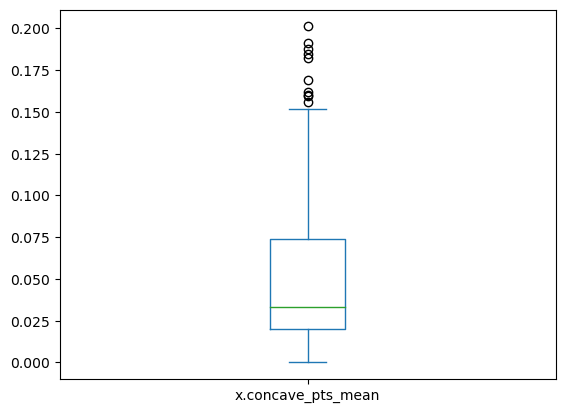

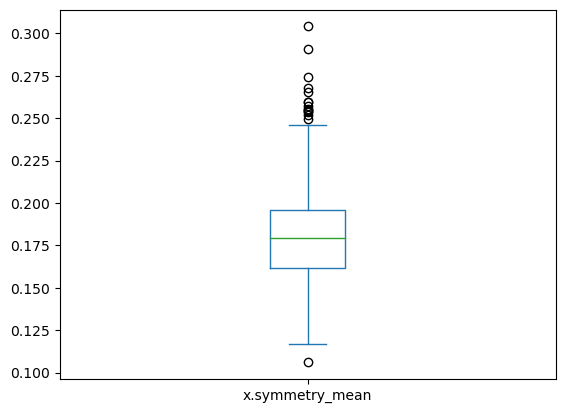

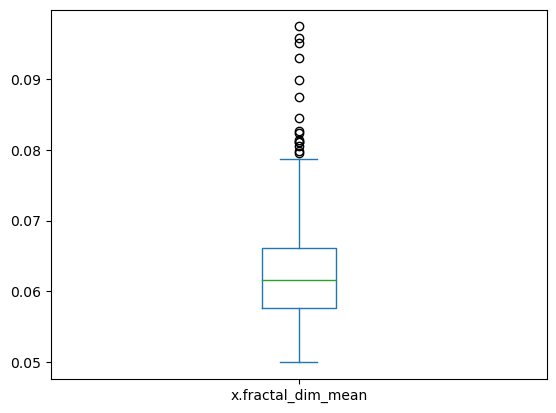

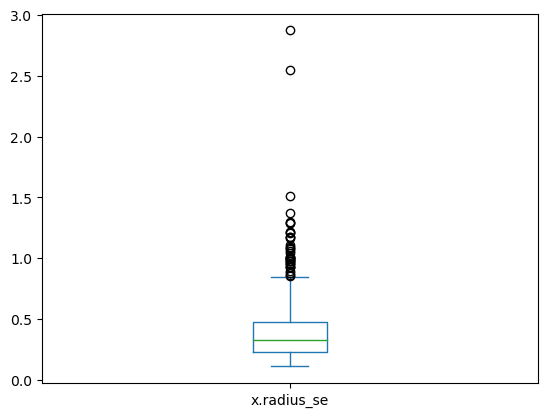

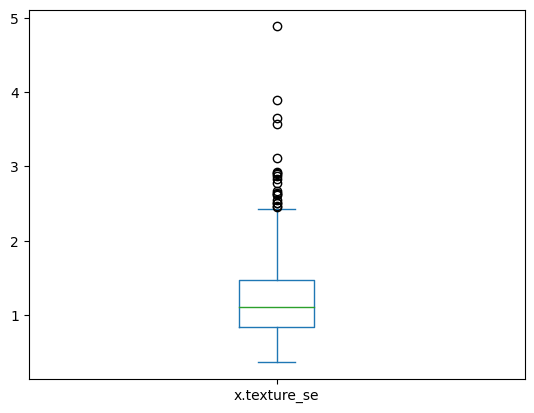

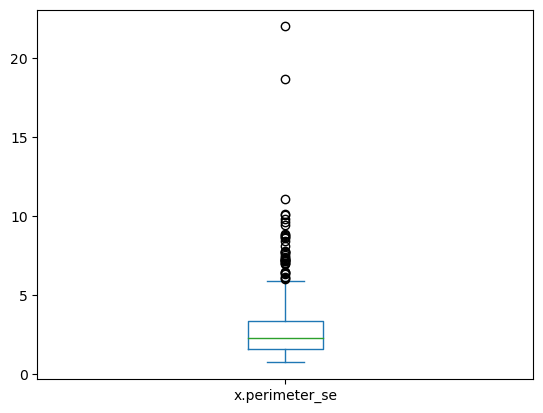

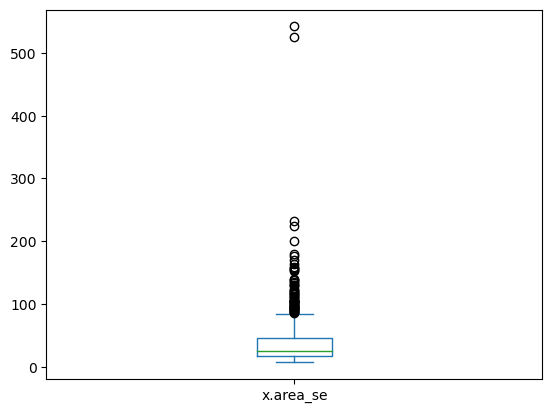

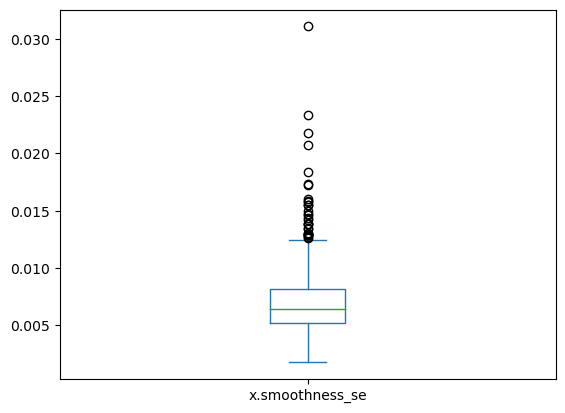

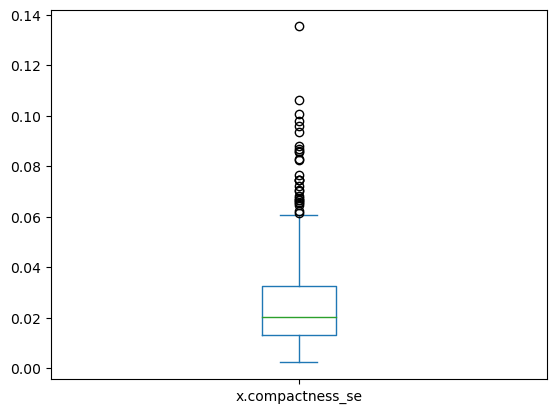

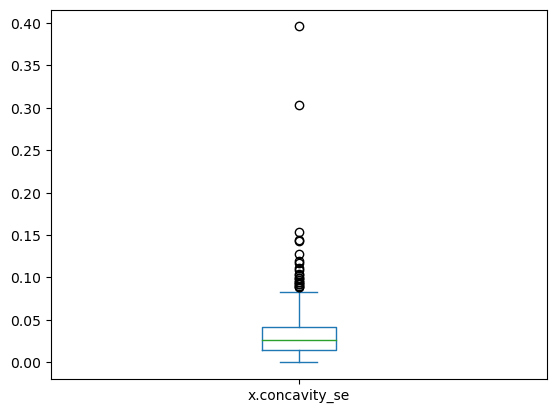

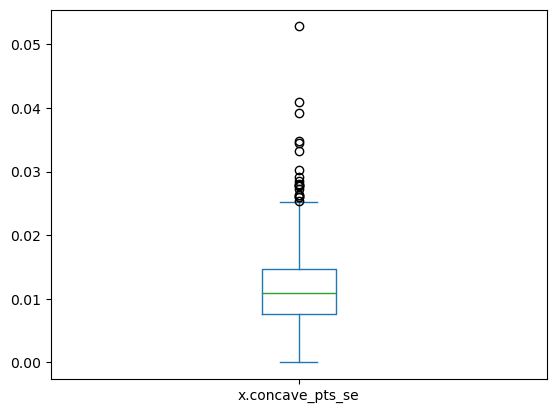

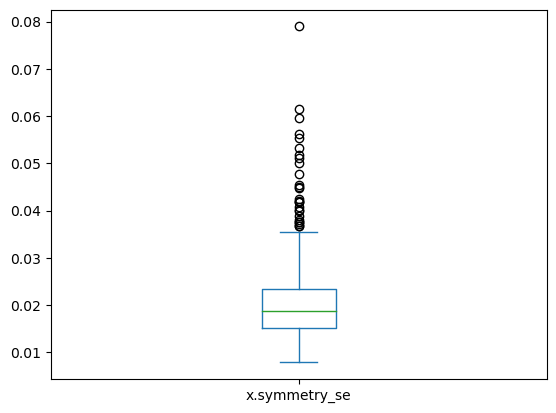

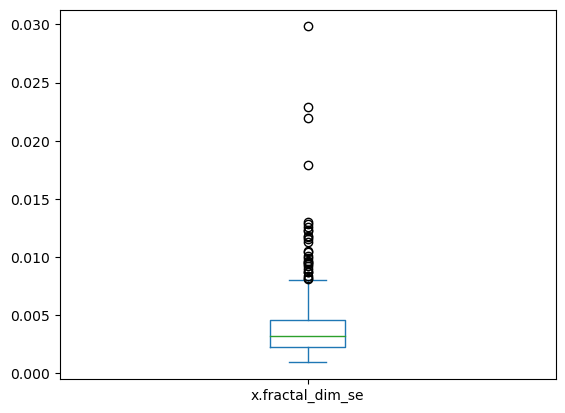

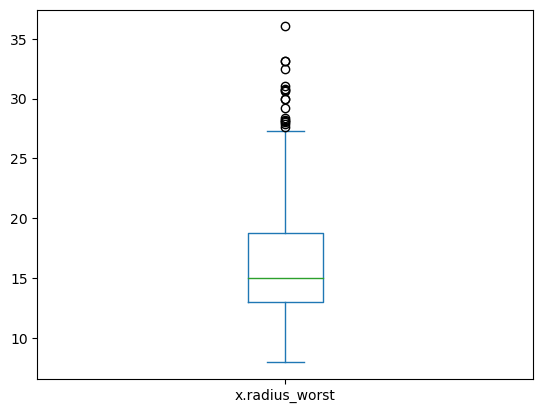

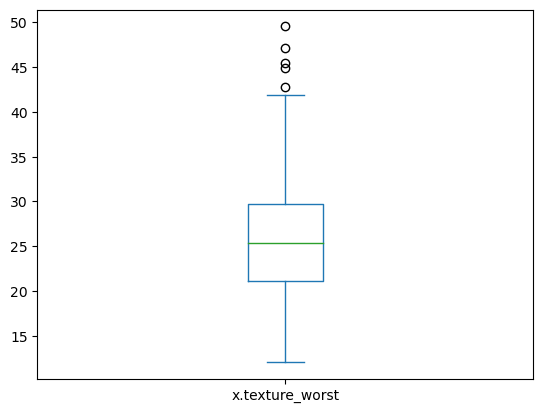

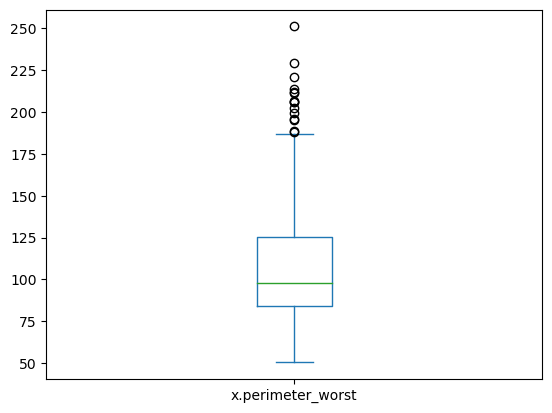

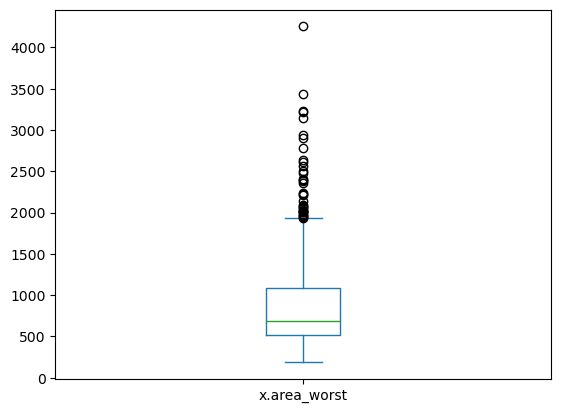

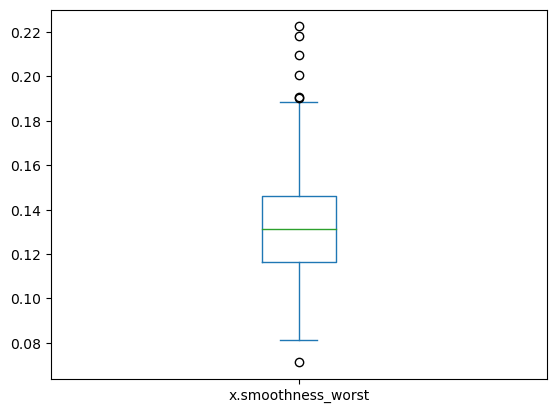

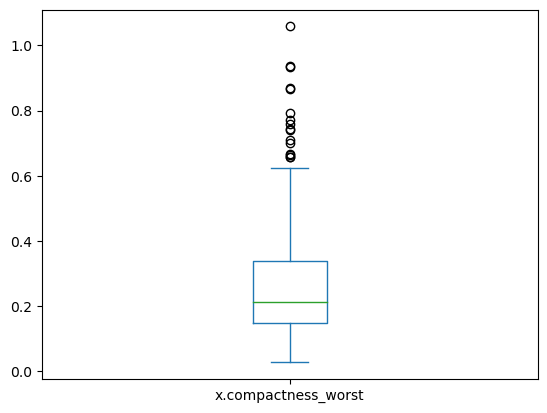

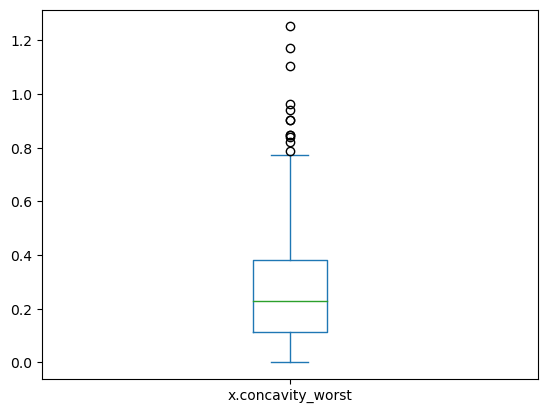

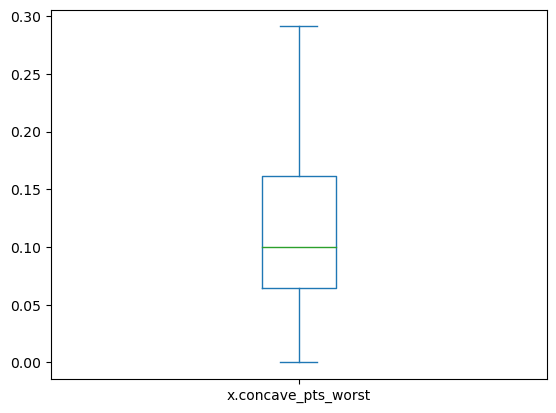

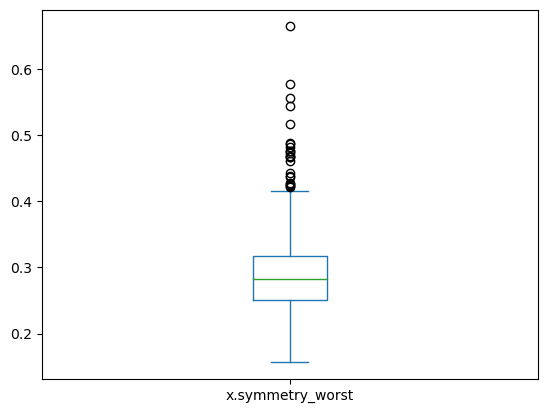

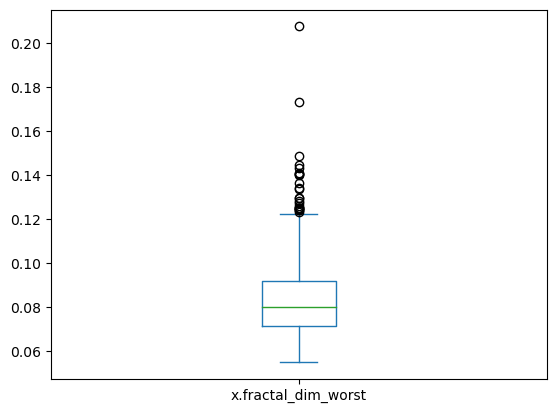

In [10]:
feat_col = df.select_dtypes(include=np.number)
for col in feat_col:
    df[col].plot(kind='box')
    plt.show()

In [11]:
# as we can see outliers are present inside our features.

In [12]:
# We can treat our outlier simply by trimming it.(Let's take this approach )
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
df1 = df[~((df<ll)|(df>ul)).any(axis=1)]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_9768\562401224.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df[~((df<ll)|(df>ul)).any(axis=1)]


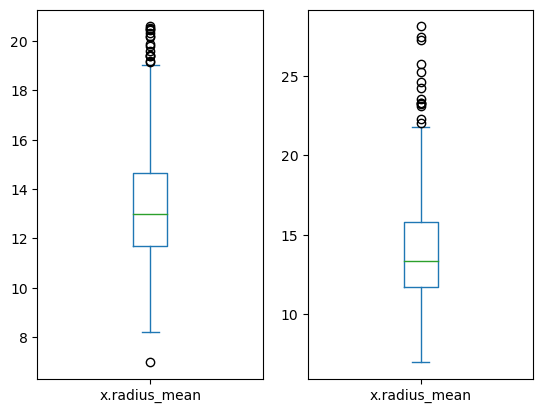

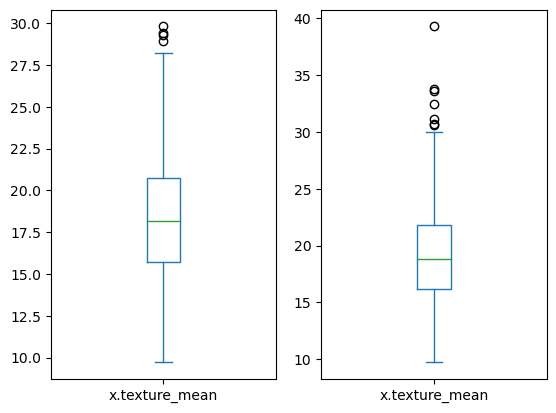

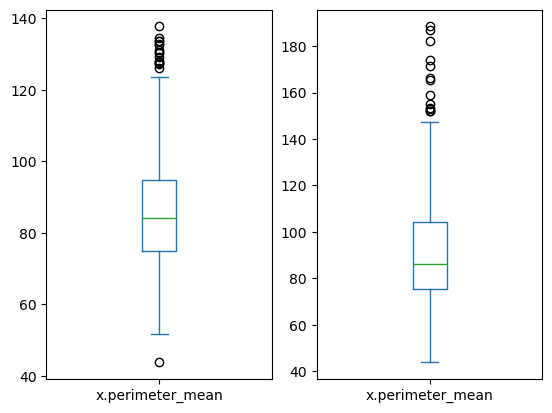

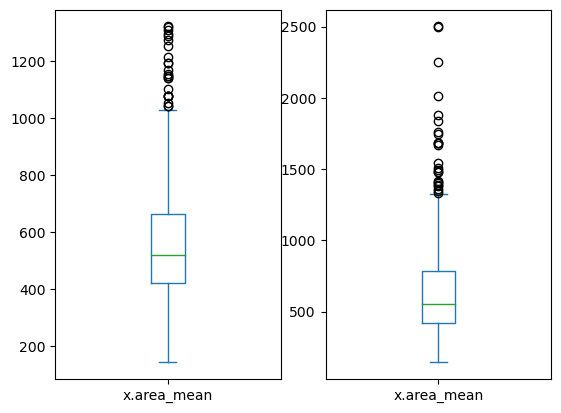

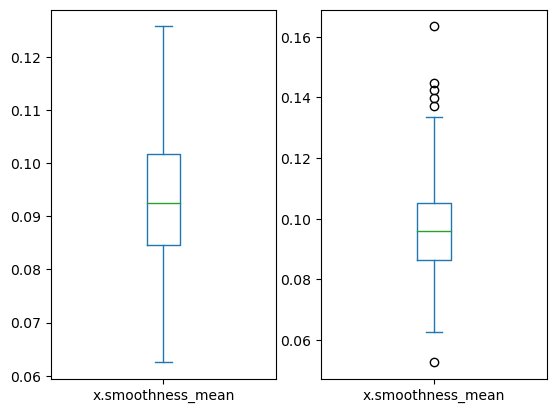

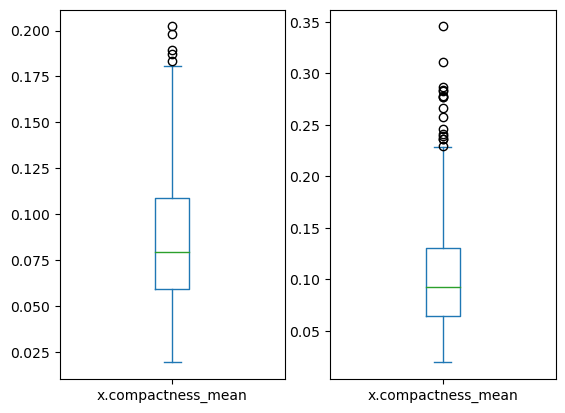

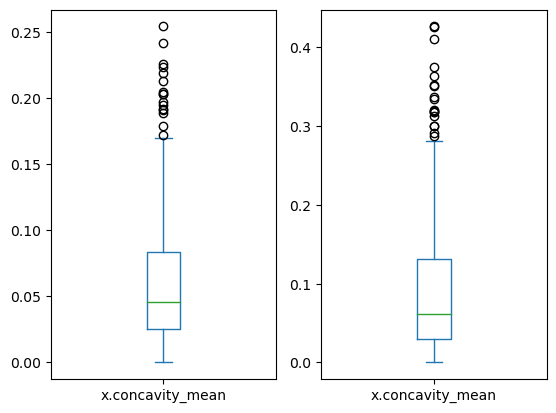

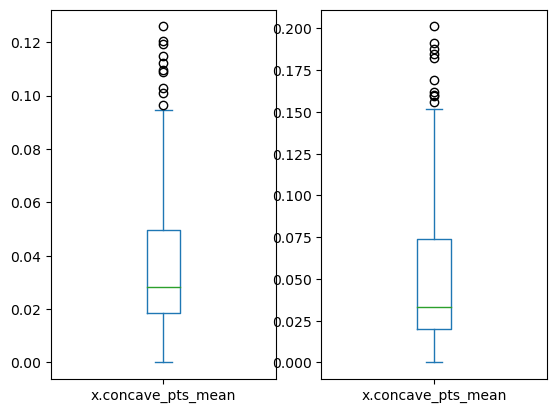

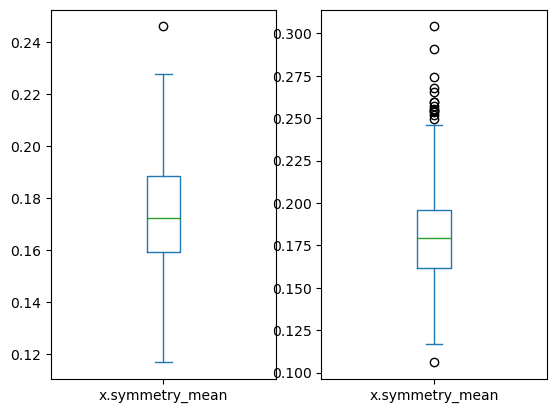

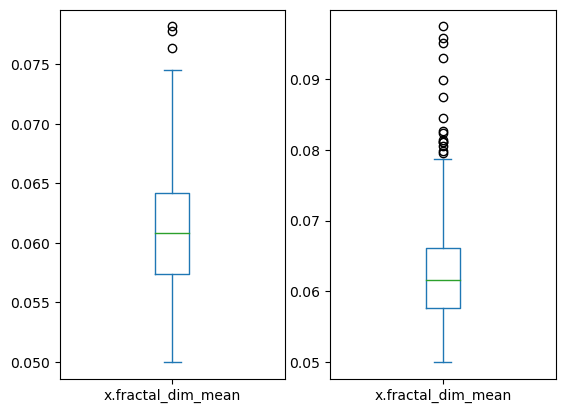

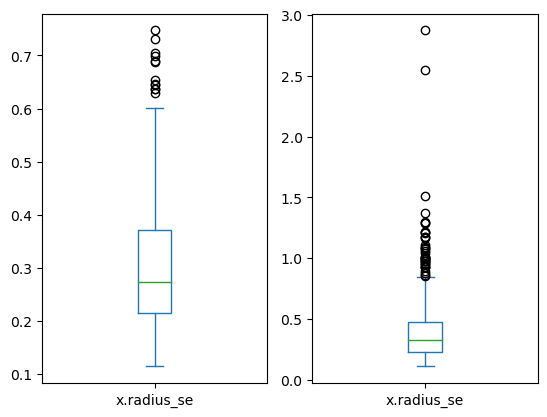

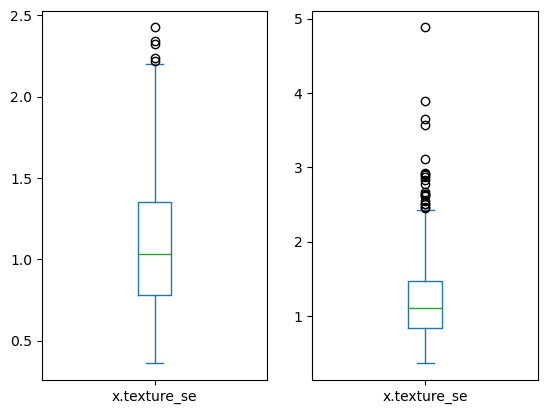

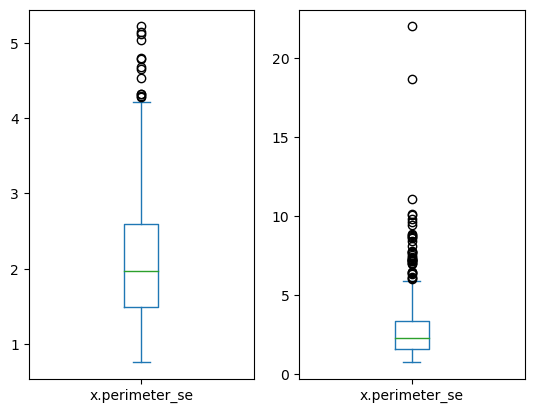

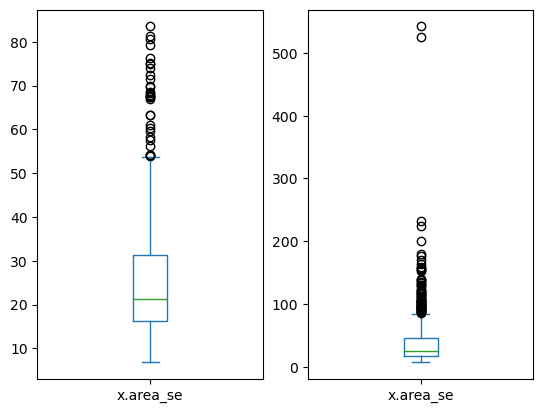

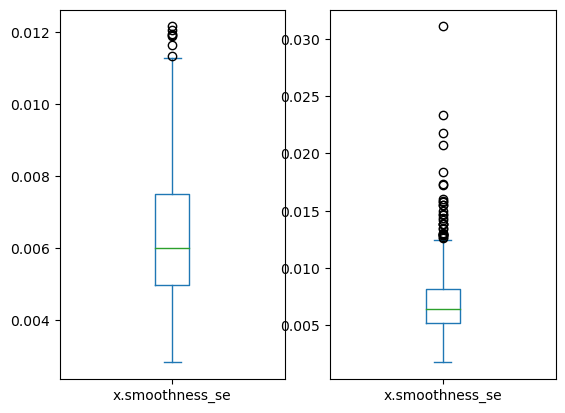

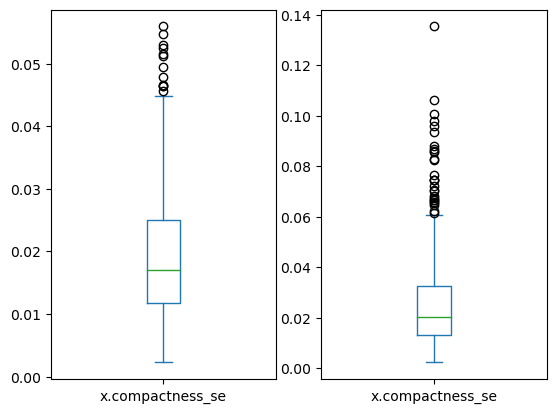

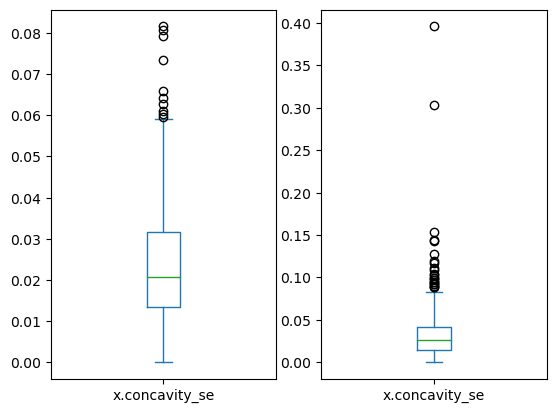

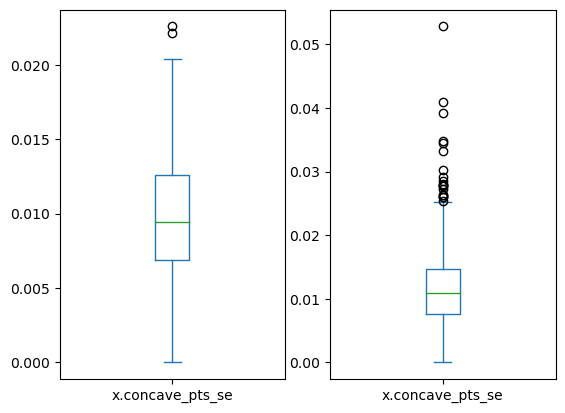

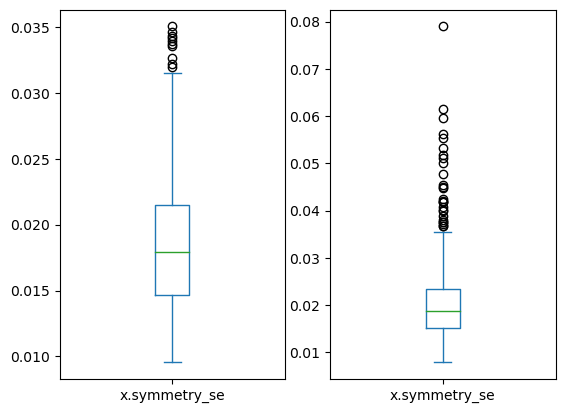

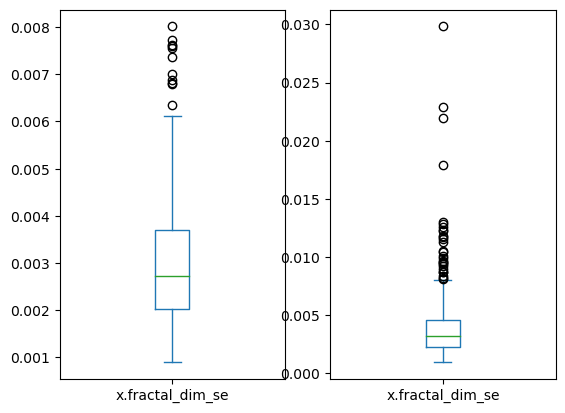

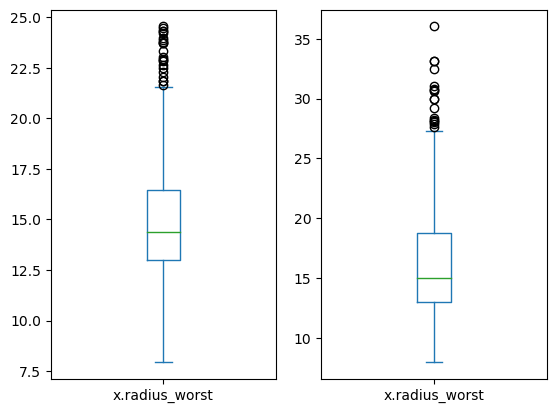

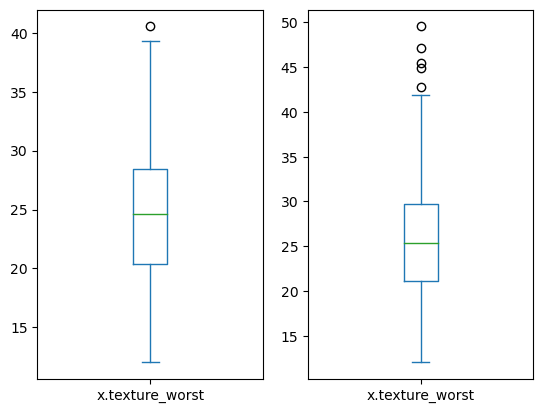

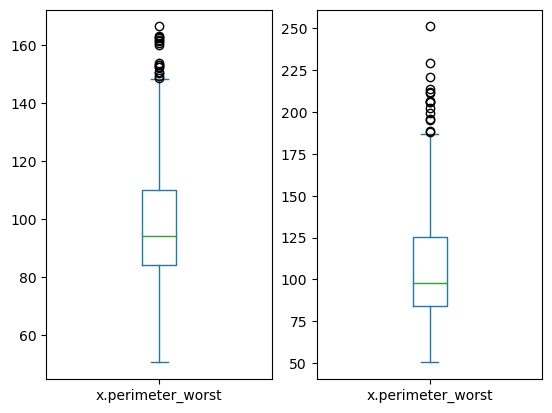

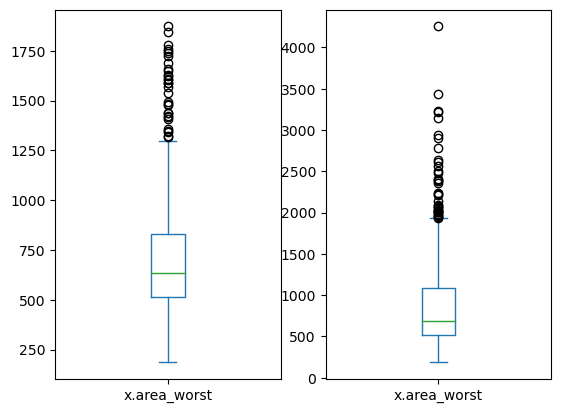

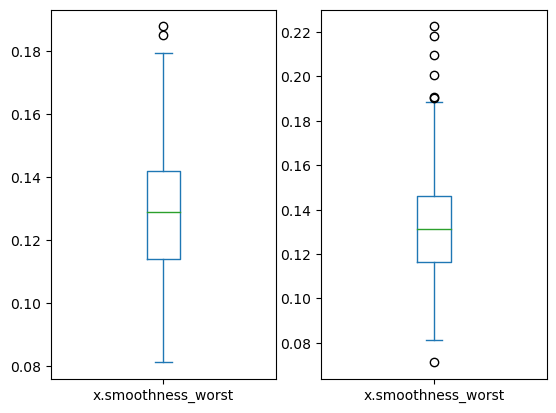

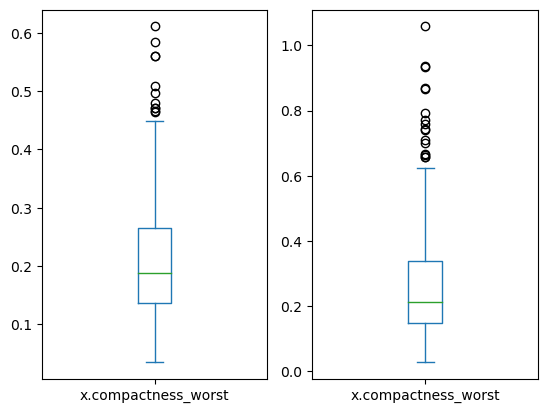

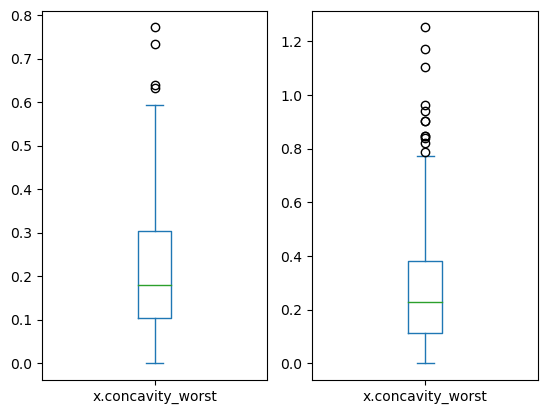

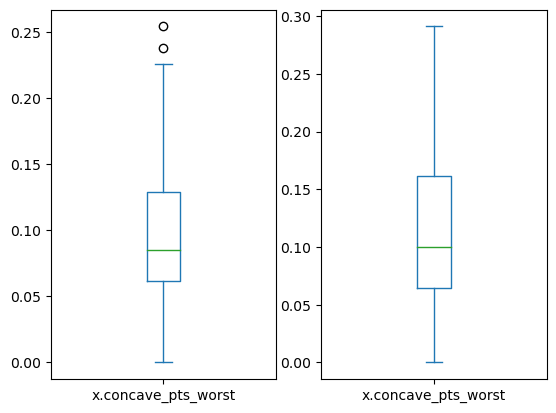

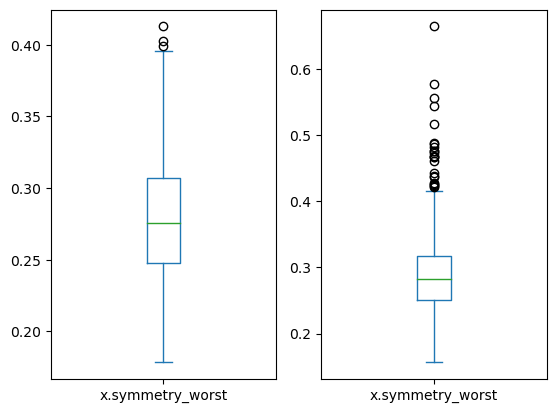

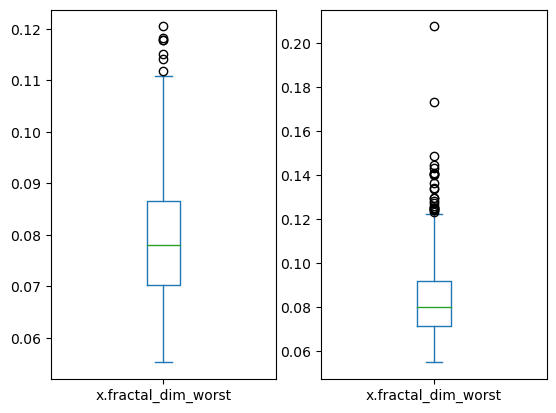

In [13]:
num1_col = df.select_dtypes(include=np.number)
for col in num1_col:
    plt.subplot(1,2,1)
    df1[col].plot(kind='box')
    plt.subplot(1,2,2)
    df[col].plot(kind='box')
    plt.show()

In [14]:
# In above shell we produced boxplot taking into considration there distribution before and after the outlier treatment.

In [15]:
# And we can infer that from our above plot that outliers are reduced by some amount. 

 Feature Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


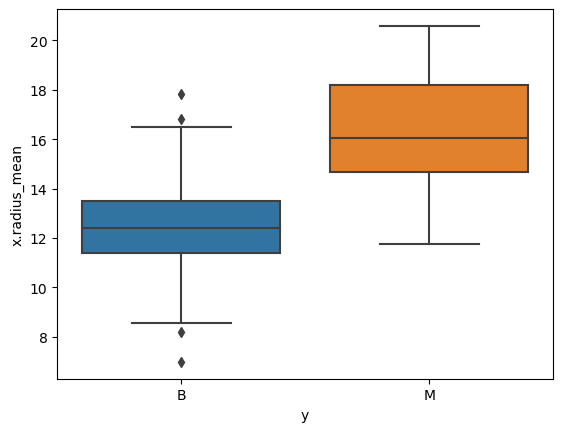

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


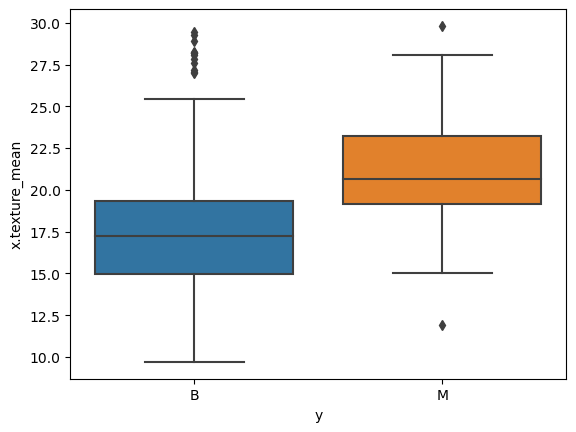

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


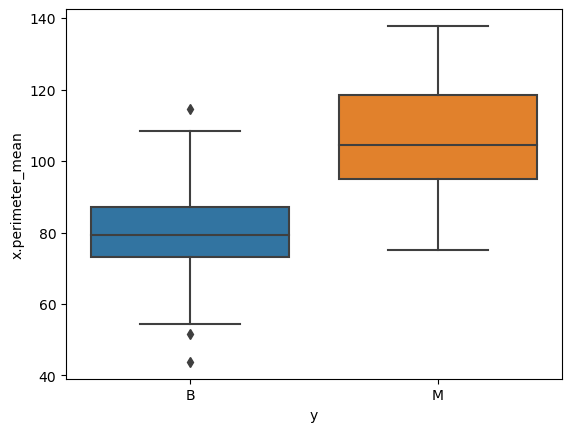

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


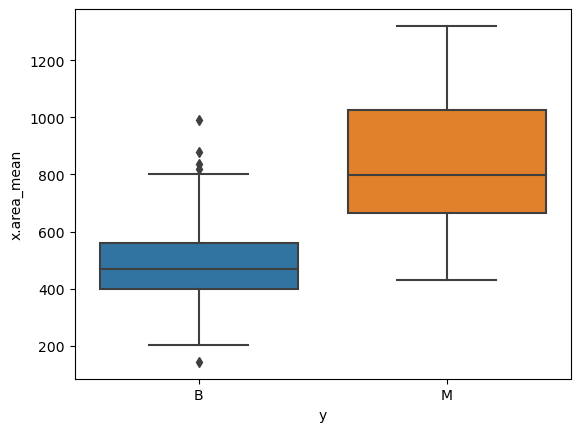

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


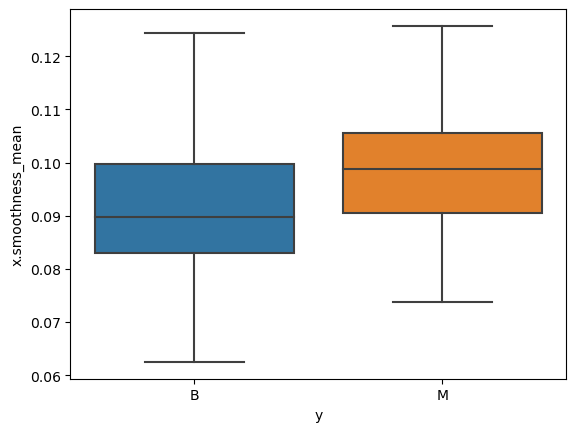

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


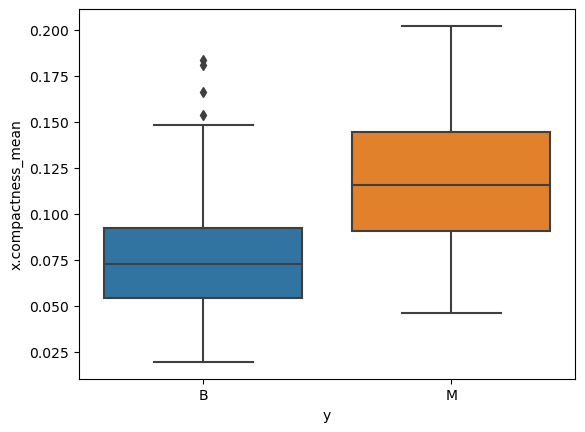

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


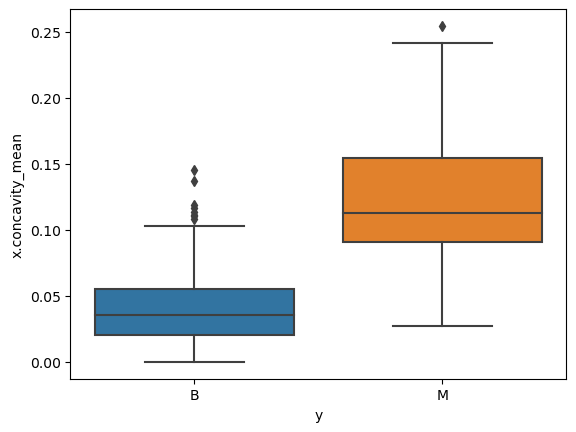

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


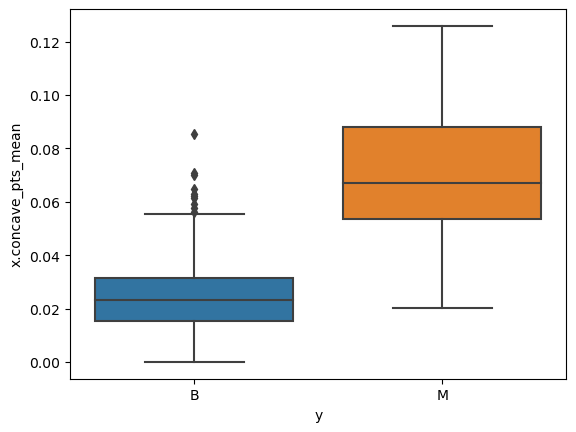

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


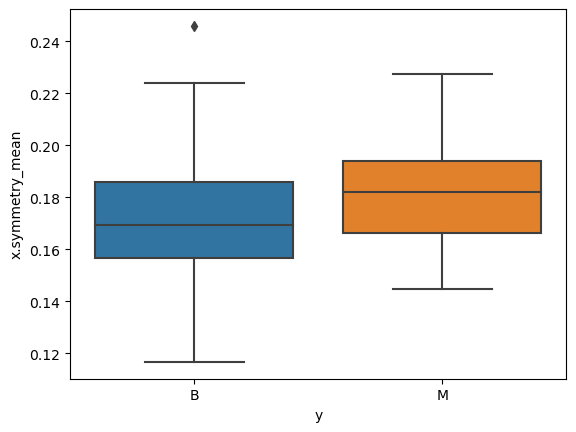

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


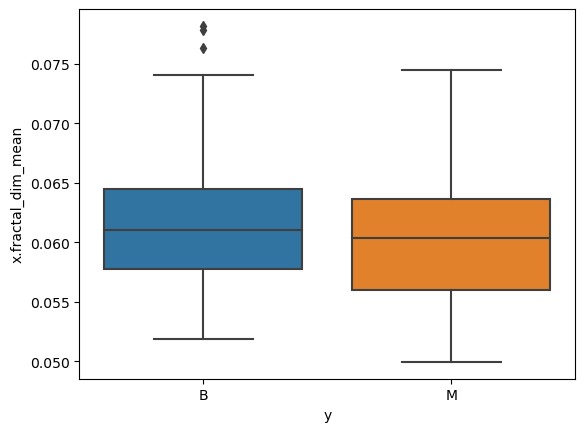

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


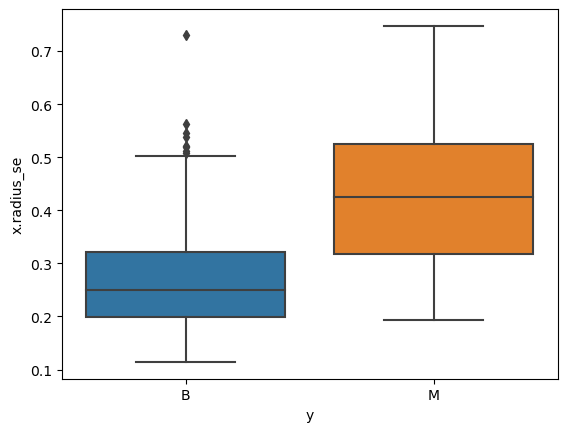

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


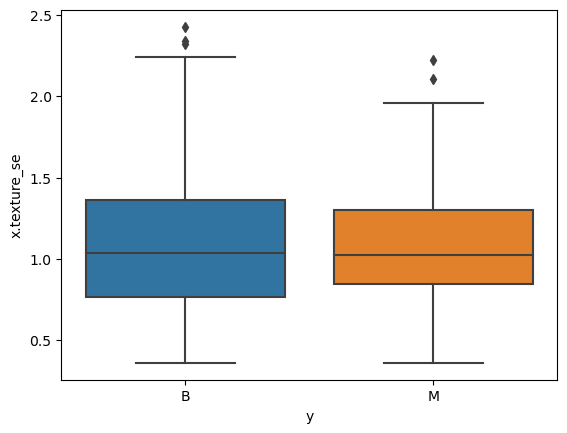

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


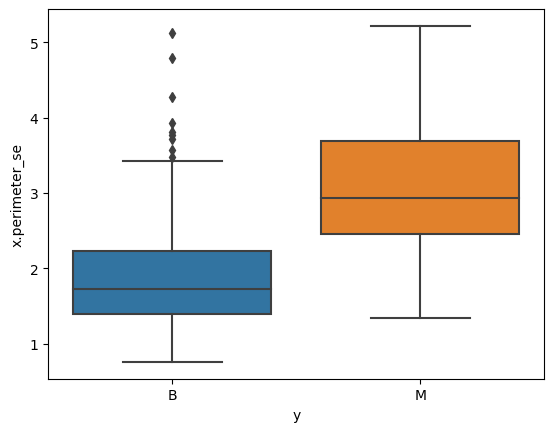

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


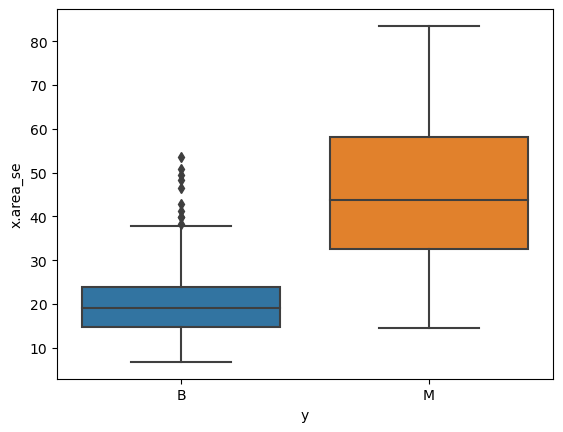

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


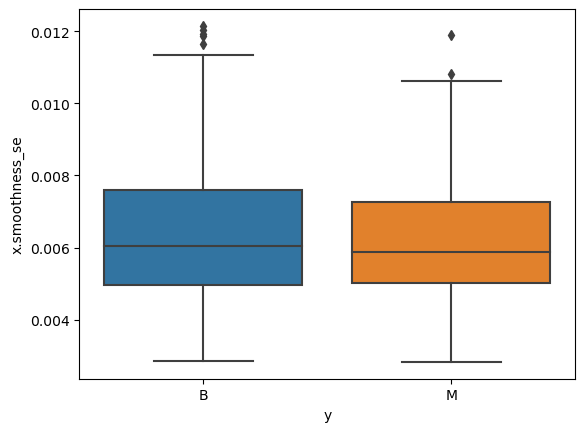

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


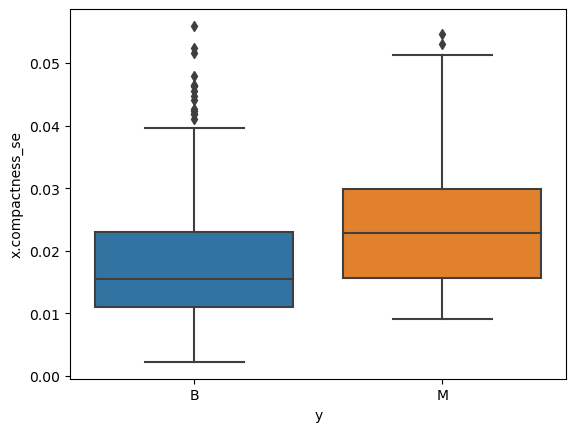

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


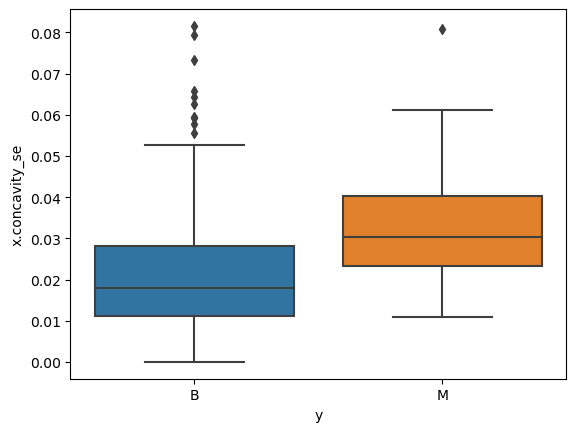

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


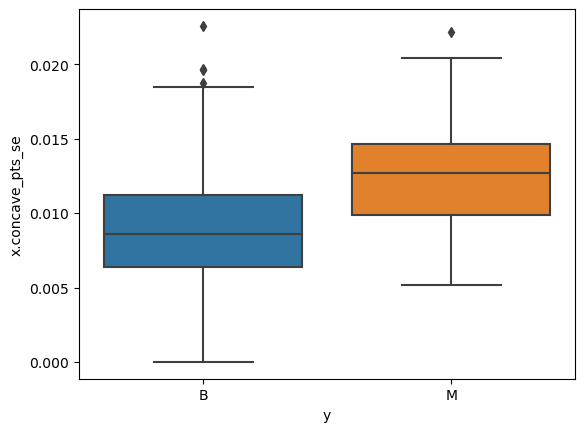

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


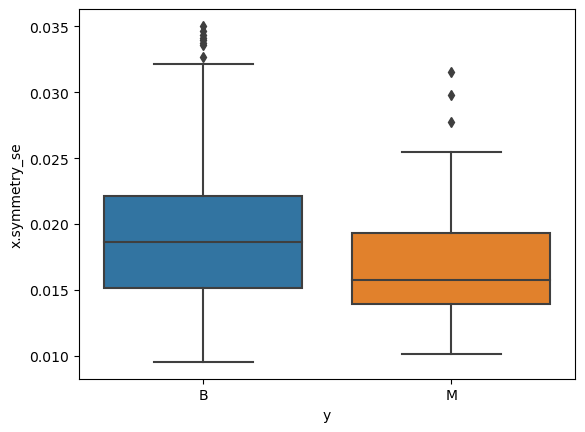

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


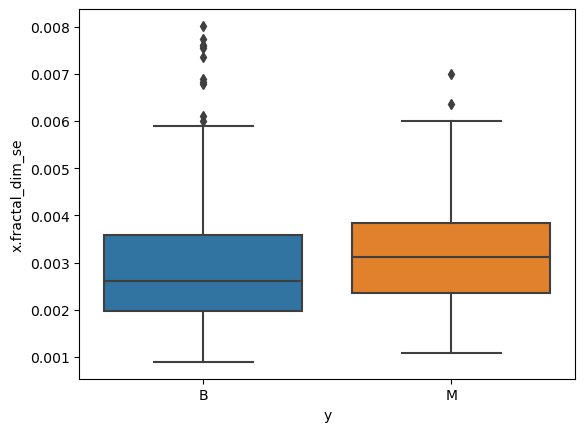

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


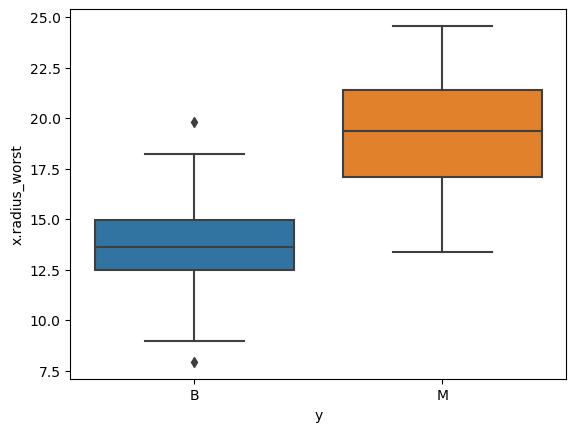

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


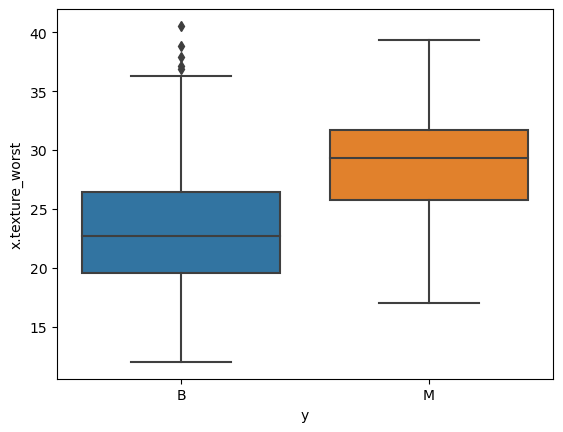

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


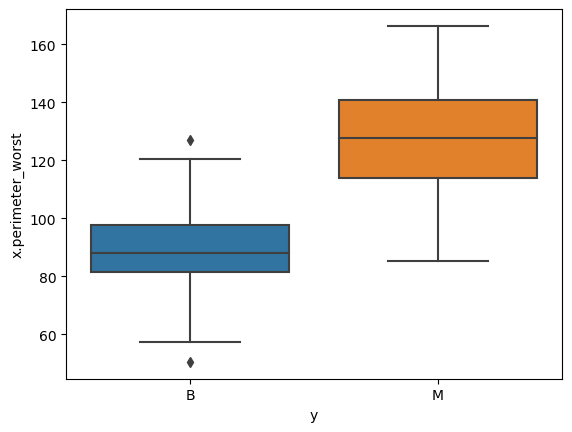

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


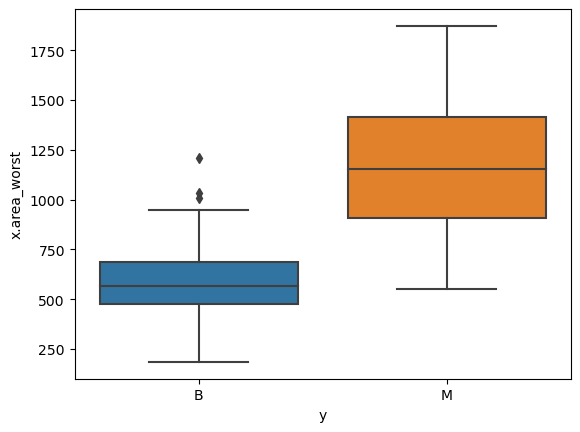

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


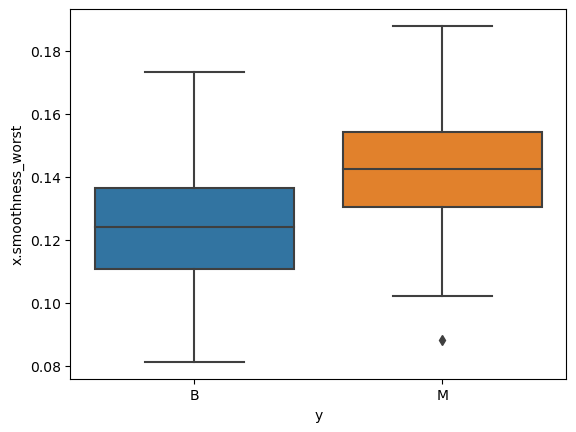

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


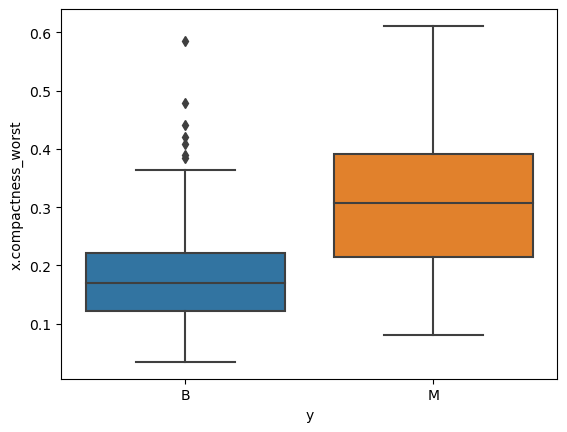

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


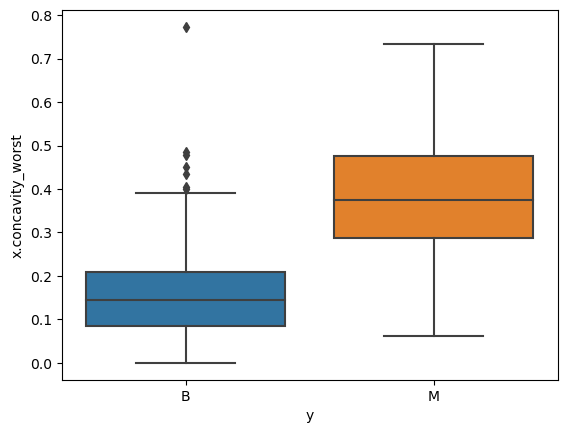

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


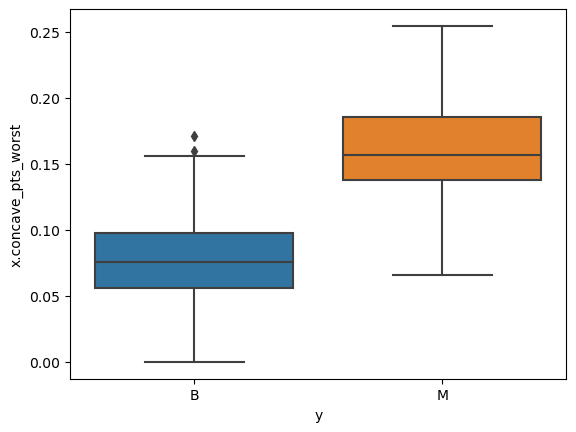

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


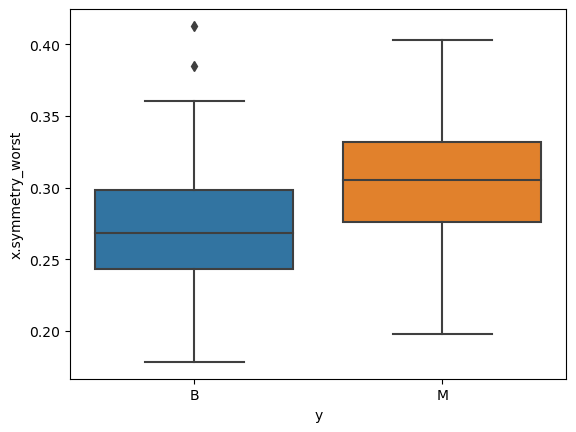

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


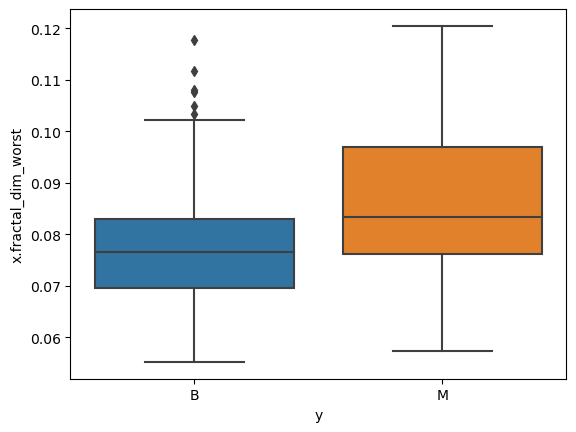

In [16]:
#cat vs num
for col in num1_col:
    sns.boxplot(df1['y'], df1[col])
    plt.show()

In [17]:
# x.symmetry_mean, x.fractal_dim_mean, x.texture_se, x.smoothness_se --> these numerical features seems to have equal 
# mean values for the subcategories of the target variable. Let's check this with the help of hypothesis testing.

In [18]:
# Reaching to the conclusion with the help of hypothesis testing.
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, kruskal
xsm_B = df1[df1['y']=='B']['x.symmetry_mean']
xsm_M = df1[df1['y']=='M']['x.symmetry_mean']
xfdm_B = df1[df1['y']=='B']['x.fractal_dim_mean']
xfdm_M = df1[df1['y']=='M']['x.fractal_dim_mean']
xts_B = df1[df1['y']=='B']['x.texture_se']
xts_M = df1[df1['y']=='M']['x.texture_se']
xse_B = df1[df1['y']=='B']['x.smoothness_se']
xse_M = df1[df1['y']=='M']['x.smoothness_se']

In [19]:
print(shapiro(df1['x.symmetry_mean']))
print(shapiro(df1['x.fractal_dim_mean']))
print(shapiro(df1['x.texture_se']))
print(shapiro(df1['x.smoothness_se']))

ShapiroResult(statistic=0.9959577918052673, pvalue=0.4037717878818512)
ShapiroResult(statistic=0.9833160638809204, pvalue=0.00014955790538806468)
ShapiroResult(statistic=0.9682521820068359, pvalue=1.3262487641441112e-07)
ShapiroResult(statistic=0.9621119499206543, pvalue=1.2941937299615347e-08)


In [20]:
# since pval for all of the above mentioned features except 'x.symmetry_mean' is less than 0.05 and also very close to
# 0, hence we can infer that all the above mentioned features are not normally distributed except 'x.symmetry_mean'.

In [21]:
# So let's perform parametric test on 'x.symmetry_mean' to check whether mean of 'B' and 'M' categories are equal to
# each other or not.
stats.ttest_ind(xsm_B,xsm_M)

Ttest_indResult(statistic=-4.997885316717348, pvalue=8.718112785425203e-07)

In [22]:
#Now we need to perform non parametric test on the remaining feature to check whether mean of 'B' and 'M' categories are equal to
# each other or not.


In [23]:
# perform the Mann-Whitney U test on 'x.fractal_dim_mean'
statistic, p_value = mannwhitneyu(xfdm_B, xfdm_M)

# print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)


Mann-Whitney U statistic: 16467.0
p-value: 0.07399033682998121


pval > 0.05, hence can't reject the null hypothesis, therefore we can infer that mean of 'B' and 'M' categories are equal
to each other. Therefore we can say that 'x.fractal_dim_mean' is a non significant feature.

In [24]:
# perform the Mann-Whitney U test on 'x.texture_se'
statistic, p_value = mannwhitneyu(xts_B, xts_M)

# print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 14193.0
p-value: 0.6084524025552235


pval > 0.05, hence can't reject the null hypothesis, therefore we can infer that mean of 'B' and 'M' categories are equal to each other. Therefore we can say that 'x.texture_se' is a non significant feature.

In [25]:
# perform the Mann-Whitney U test on 'x.smoothness_se'
statistic, p_value = mannwhitneyu(xse_B, xse_M)

# print the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U statistic: 15340.5
p-value: 0.5174328588008723


pval > 0.05, hence can't reject the null hypothesis, therefore we can infer that mean of 'B' and 'M' categories are equal to each other. Therefore we can say that 'x.smoothness_se' is a non significant feature.

In [26]:
#x.smoothness_se, x.texture_se, x.fractal_dim_mean--> Among all the features these 3 are non significant features.

In [27]:
df2 = df1.drop(['x.smoothness_se', 'x.texture_se', 'x.fractal_dim_mean'], axis=1)
df2.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.radius_se,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.2699,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.1852,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.2773,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.1839,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.1563,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [28]:
# Storing all the sgninficant features and there values in a new dataframe (df2).

In [29]:
#finding the features those are skewed
num_col = df2.select_dtypes(include=np.number)
skewed_ft=[]
for col in num_col:
    if df2[col].skew()>1 or df2[col].skew()<-1:
        skewed_ft.append(col)
        print(df2[col].skew())
skewed_ft        

1.2443298865247563
1.3751956294745806
1.1533759870386895
1.0554406907948275
1.0628132258085234
1.563841939264896
1.015096968669638
1.1920577405828638
1.37445399831552


['x.area_mean',
 'x.concavity_mean',
 'x.concave_pts_mean',
 'x.radius_se',
 'x.perimeter_se',
 'x.area_se',
 'x.compactness_se',
 'x.fractal_dim_se',
 'x.area_worst']

In [30]:
df2[skewed_ft].describe()

,x.area_mean,x.concavity_mean,x.concave_pts_mean,x.radius_se,x.perimeter_se,x.area_se,x.compactness_se,x.fractal_dim_se,x.area_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,570.547990,0.060442,0.035902,0.306608,2.153439,26.512990,0.019689,0.002998,728.471608
std,222.883241,0.049068,0.025625,0.127897,0.892941,15.553495,0.010626,0.001306,329.649485
min,143.500000,0.000000,0.000000,0.114400,0.757000,6.802000,0.002252,0.000895,185.200000
25%,420.350000,0.025628,0.018640,0.214225,1.491500,16.365000,0.011800,0.002035,516.025000
50%,518.300000,0.045580,0.028295,0.273450,1.970000,21.195000,0.017035,0.002730,632.500000
75%,664.200000,0.083572,0.049478,0.371075,2.594000,31.307500,0.025057,0.003691,830.575000
max,1320.000000,0.254500,0.125900,0.747400,5.216000,83.500000,0.055920,0.008015,1872.000000


In [31]:
# skewed_ft is a list containing the features those are skewed. Transformation on this features to reduce there skewness.

X_skewed = df2[skewed_ft]
X_nskewed = np.log1p(X_skewed)
X_nskewed.head()

,x.area_mean,x.concavity_mean,x.concave_pts_mean,x.radius_se,x.perimeter_se,x.area_se,x.compactness_se,x.fractal_dim_se,x.area_worst
0,6.340888,0.064514,0.046702,0.238938,1.117761,3.201119,0.014494,0.002297,6.568359
1,6.255750,0.044667,0.030626,0.169912,0.868360,2.751748,0.018802,0.002422,6.448098
2,5.616407,0.029132,0.020547,0.244748,1.067809,2.815409,0.014218,0.002964,5.755426
3,6.263017,0.025297,0.028811,0.168814,0.774727,2.718660,0.004887,0.001775,6.304266
4,5.312713,0.015755,0.005900,0.145225,0.739076,2.219747,0.016326,0.002579,5.493884


In [32]:
#checking skewness of the feature after performing transformation on it.
for col in X_nskewed.columns:
    print(col, X_nskewed[col].skew())

x.area_mean 0.13044221793531133
x.concavity_mean 1.2536799187657255
x.concave_pts_mean 1.0999366761983667
x.radius_se 0.8297452441670493
x.perimeter_se 0.45286460604946766
x.area_se 0.4442840701004708
x.compactness_se 0.9898434097907975
x.fractal_dim_se 1.1876078801148438
x.area_worst 0.3236345865191763


 Scaling:

In [33]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
X = pd.concat([df2.drop(skewed_ft, axis=1), X_nskewed], axis=1)
X_new_arr = sc.fit_transform(X.drop('y', axis=1))
X_new = pd.DataFrame(X_new_arr, columns=X.drop('y', axis=1).columns)
X_new.head()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.smoothness_mean,x.compactness_mean,x.symmetry_mean,x.concavity_se,x.concave_pts_se,x.symmetry_se,x.radius_worst,...,x.fractal_dim_worst,x.area_mean,x.concavity_mean,x.concave_pts_mean,x.radius_se,x.perimeter_se,x.area_se,x.compactness_se,x.fractal_dim_se,x.area_worst
0,0.066019,-1.061350,0.062824,0.374970,-0.142265,0.714699,-0.009560,0.803457,0.221905,0.006931,...,-0.556714,0.166293,0.152634,0.481187,-0.255221,0.021204,0.034590,-0.477980,-0.534729,0.155593
1,-0.119392,-0.715749,-0.045972,1.180711,1.166153,1.109060,-0.466170,-0.848246,-0.351823,-0.182003,...,0.184657,-0.065878,-0.289248,-0.178326,-0.990161,-0.920926,-0.872223,-0.061949,-0.438789,-0.137329
2,-1.560757,-1.552872,-1.549501,0.757510,-0.610845,0.378049,-0.275971,1.066341,0.311194,-1.504537,...,-0.144306,-1.809355,-0.635161,-0.591802,-0.193358,-0.167493,-0.743759,-0.504636,-0.022165,-1.824486
3,-0.139545,-0.021985,-0.225515,-0.285555,-1.391145,-1.295583,-0.701434,0.428972,1.534641,-0.553675,...,-1.431275,-0.046060,-0.720531,-0.252796,-1.001846,-1.274631,-0.938993,-1.405852,-0.936271,-0.487664
4,-2.087968,-0.426467,-2.062568,-0.603371,-0.767993,0.156821,-0.539069,-0.990352,1.350364,-1.896651,...,-0.436361,-2.637524,-0.932989,-1.192724,-1.253001,-1.409306,-1.945781,-0.301090,-0.318305,-2.461528


In [34]:
le = LabelEncoder()
y = le.fit_transform(df2['y'])
# to convert the datatype of target feature from object to numerical 

In [35]:
# B --> 0
# M --> 1

In [36]:
# Splitting of dataset into test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [37]:
# Next steps to be followed 
# 1. Building logistic regression model
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
df1['y'].value_counts()
# Here we are not having the problem of imbalanced datasets. 

B    300
M     98
Name: y, dtype: int64

In [39]:
logiR = LogisticRegression()
logiR.fit(X_train, y_train)
y_pred = logiR.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [40]:
# Accuracy score for logistic reg on test dataset is quite impressive
# Now let's check accuracy score for logistic reg on train dataset.
accuracy_score(y_train, logiR.predict(X_train))

0.9928057553956835

In [41]:
# Now using cross validation score for finding bias and variance error.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

# Assuming you have your feature matrix X and target vector y

# Create a classifier object (you can replace it with your chosen classifier)
classifier = LogisticRegression()

# Create a cross-validation object (here, we use 5-fold cross-validation)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate the cross-validation scores
scores = cross_val_score(classifier, X_new, y, cv=cv, scoring='accuracy')

# Print the individual scores and the mean score
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Variance error is: ", scores.var())

Cross-validation scores: [0.9625     0.9625     0.9875     0.98734177 0.97468354]
Mean accuracy: 0.9749050632911394
Variance error is:  0.00012422488383271934


In [42]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9


In [43]:
# Variance error in Logistic Regression model is less than variance error in Naive Bayes

In [44]:
# Now let's check accuracy score for Naive Bayes classifier on train dataset.
accuracy_score(y_train, clf.predict(X_train))

0.9568345323741008

In [45]:
# Accuracy Score on train dataset is 95% which is less than accuracy score of logistic model.

In [46]:
# So in between these two Logistic regression is clear winner.

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf_Dt = DecisionTreeClassifier() 
clf_Dt.fit(X_train, y_train)
y_pred = clf_Dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9083333333333333


In [49]:
# Variance error in Logistic Regression model is less than variance error in Decision Tree

In [50]:
# Now let's check accuracy score for Naive Bayes classifier on train dataset.
accuracy_score(y_train, clf_Dt.predict(X_train))

1.0

In [51]:
#On train dataset there is no error , hence we can say that the model is overfitted, here also Logistic regression is 
# the clear winner.

In [52]:
# for reducing the variance error bagging technique of Random forest or grid search CV on Decision Tree can be used
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9416666666666667


In [53]:
print("Accuracy on train data:", accuracy_score(y_train, clf_rf.predict(X_train)))

Accuracy on train data: 1.0


In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 8]
}
clf_gsv=GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy')
clf_gsv.fit(X_train, y_train)
best_params = clf_gsv.best_params_
best_params

{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}

In [55]:
best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9416666666666667


In [57]:
# now finding accuracy on train data
print("Accuracy on train data:", accuracy_score(y_train, best_clf.predict(X_train)))

Accuracy on train data: 1.0


In [58]:
# Still accuracy on test data for logistic regression is around 97% which is best till now, so again logistic regression
# is the clear winner.

In [59]:
from sklearn.ensemble import StackingClassifier
meta_classifier = LogisticRegression()
base_classifier = [('rf',RandomForestClassifier())]
stacking_classifier = StackingClassifier(estimators=base_classifier, final_estimator=meta_classifier)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.9333333333333333


In [60]:
# finding accuracy on test data for the above stacking classifier
print('Accuracy on train data:', accuracy_score(y_train, stacking_classifier.predict(X_train)))

Accuracy on train data: 1.0


In [61]:
# Still Logistic Regression is the clear winner

# We will choose Logistic regression as our final model for deployment.

# Implementing Deep Neural Network

In [63]:
from keras.models import Sequential
from keras.layers import Dense

In [94]:
from keras.utils import to_categorical
from keras.regularizers import l1, l2

In [69]:
train_labels = to_categorical(y_train, 2)
test_labels = to_categorical(y_test, 2)

In [99]:
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)))
model.add(Dense(64, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dense(2, activation='softmax'))

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 1s 254ms/step - loss: 2.6612 - accuracy: 0.9279 - val_loss: 2.6069 - val_accuracy: 0.9286
Epoch 2/10
2/2 [==============================] - 0s 34ms/step - loss: 2.6035 - accuracy: 0.9369 - val_loss: 2.5517 - val_accuracy: 0.9286
Epoch 3/10
2/2 [==============================] - 0s 32ms/step - loss: 2.5482 - accuracy: 0.9505 - val_loss: 2.4991 - val_accuracy: 0.9643
Epoch 4/10
2/2 [==============================] - 0s 39ms/step - loss: 2.4950 - accuracy: 0.9505 - val_loss: 2.4476 - val_accuracy: 0.9643
Epoch 5/10
2/2 [==============================] - 0s 36ms/step - loss: 2.4437 - accuracy: 0.9505 - val_loss: 2.3975 - val_accuracy: 0.9643
Epoch 6/10
2/2 [==============================] - 0s 32ms/step - loss: 2.3934 - accuracy: 0.9550 - val_loss: 2.3485 - val_accuracy: 0.9643
Epoch 7/10
2/2 [==============================] - 0s 31ms/step - loss: 2.3445 - accuracy: 0.9685 - val_loss: 2.3005 - val_accuracy: 0.9643
Epoch 8/10
2/2 [==========

In [72]:
# Evaluate the model

In [102]:
test_loss, test_accuracy = model.evaluate(X_test, test_labels)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

4/4 [==============================] - 0s 2ms/step - loss: 2.1963 - accuracy: 0.9500
Test loss: 2.1963
Test accuracy: 0.9500


In [74]:
# plotting the accuracy and loss curves

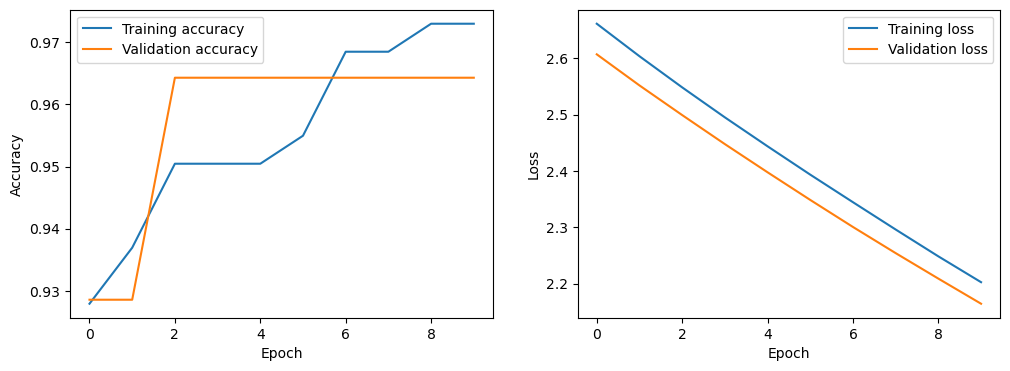

In [103]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
